In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import scipy
import numpy as np
import seaborn as sns

Objetivos do Script:

Esse script tem como objetivo ler os dados que foram capturados da nossa amostra piloto e realizar alguns estudos em cima desses dados. 

Os 6 primeiros tópicos que eu separei abaixo são utilizados na grande maioria dos scripts de tratamento de dados desse estudo. 
Deixei padronizado para que seja possivel tratar simulações com um dispositivo ou vários.

Sumário:
  - Leitura dos dados
  - Separar publicações e confirmação de entrega por dispositivo simulado.
  - Criação de um dataframe com informações capturadas. 
  - Medidas de tendência centrar por dispositivo
  - Medidas de tendência centrar de todos os dispositivos.
  - Gráfico de dispersão da amostra.
  - Calculo do tamanho da amostra.

Como estamos trabalhando com uma amostra piloto temos como objetivo calcular o tamanho das amostras isso será realizado na ultima parte desse script.


In [3]:
data = pd.read_csv("./data.csv")
ports = data["Source Port"].unique()
ports = ports[ports !=1883]


,No.,Time,Source,Destination,Protocol,Length,Topic,Message Identifier,Source Port,Destination Port,Info
0,15961,1080.023169,192.168.15.4,192.168.15.3,MQTT,90,NaN,NaN,59275,1883,Connect Command
1,15963,1080.025445,192.168.15.4,192.168.15.3,MQTT,338,Deviceb'Device - 1',1.0,59275,1883,Publish Message (id=1) [Deviceb'Device - 1']
2,15964,1080.025946,192.168.15.3,192.168.15.4,MQTT,70,NaN,NaN,1883,59275,Connect Ack
3,15967,1080.029299,192.168.15.3,192.168.15.4,MQTT,70,NaN,1.0,1883,59275,Publish Ack (id=1)
4,15973,1081.031268,192.168.15.4,192.168.15.3,MQTT,338,Deviceb'Device - 1',2.0,59275,1883,Publish Message (id=2) [Deviceb'Device - 1']
...,...,...,...,...,...,...,...,...,...,...,...
1221,22013,1683.048545,192.168.15.3,192.168.15.4,MQTT,68,NaN,NaN,1883,59275,Ping Response
1222,22014,1683.048570,192.168.15.4,192.168.15.3,MQTT,338,Deviceb'Device - 1',601.0,59275,1883,Publish Message (id=601) [Deviceb'Device - 1']
1223,22015,1683.051353,192.168.15.3,192.168.15.4,MQTT,70,NaN,601.0,1883,59275,Publish Ack (id=601)
1224,22024,1684.054076,192.168.15.4,192.168.15.3,MQTT,338,Deviceb'Device - 1',602.0,59275,1883,Publish Message (id=602) [Deviceb'Device - 1']


In [4]:
#  - Separar publicações e confirmação de entrega por dispositivo simulado.
devices = {}
#  : devices será um dicionario que irá ter uma chave referente ao device e o valor será um dataframe referente aos respectivos devices 
for port in ports:  
  array_publish = data.loc[data["Source Port"] == port].dropna(subset=['Message Identifier'])
  array_publish_ack = data.loc[data["Destination Port"] == port].dropna(subset=['Message Identifier'])
  device = {"publish":array_publish, "publish_ack" : array_publish_ack}
  devices[port] = device

In [5]:
# - Criação de um dataframe com informações capturadas acima. 
data = {}
for port in ports:
    RTT = pd.DataFrame(columns=["Time_publish", "Time_ack"])
    for index, row in devices[port]["publish"].iterrows():
        id = int(row["Message Identifier"])
        time_publish = row["Time"]
        RTT.loc[id, "Time_publish"] = time_publish 

    for index, row in devices[port]["publish_ack"].iterrows():
        id = int(row["Message Identifier"])
        time_publish = row["Time"]
        RTT.loc[id, "Time_ack"] = time_publish
    RTT.loc[id, "Time_ack"] = time_publish
    RTT["RTT"]  =(RTT["Time_ack"] - RTT["Time_publish"] )* 1000
    data[port] = RTT


## Medidas de Tendência Central Por Device

In [6]:
i=1
data_mean = []
data_median = []
data_std = []
data_min = []
data_max = []

for port in ports:
  data_mean.append(data[port]["RTT"].mean())
  data_median.append(data[port]["RTT"].mean())
  data_std.append(data[port]["RTT"].mean())
  data_min.append(data[port]["RTT"].mean())
  data_max.append(data[port]["RTT"].mean())

  print("(Device-{})Mean Round Trip Time = {}".format(i ,data[port]["RTT"].mean()))
  print("(Device-{})Median Round Trip Time = {}".format(i ,data[port]["RTT"].median()))
  print("(Device-{})Standard deviation  Round Trip Time = {}".format(i ,data[port]["RTT"].std()))
  print("(Device-{})Min Round Trip Time = {}".format(i ,data[port]["RTT"].min()))
  print("(Device-{})Max Round Trip Time = {}".format(i ,data[port]["RTT"].max()))
  print("---------------------------------------------------------------")

  i+=1

(Device-1)Mean Round Trip Time = 2.822141294021009
(Device-1)Median Round Trip Time = 2.736133500093274
(Device-1)Standard deviation  Round Trip Time = 0.5457039128427974
(Device-1)Min Round Trip Time = 2.475666000009369
(Device-1)Max Round Trip Time = 10.78684100002647
---------------------------------------------------------------


## Medidas de Tendência Central Geral

In [7]:
from statistics import mean 

print("Mean Round Trip Time = {}".format(mean(data_mean)))
print("Median Round Trip Time = {}".format(mean(data_median)))
print("Standard deviation  Round Trip Time = {}".format(mean(data_std)))
print("Min Round Trip Time = {}".format(mean(data_min)))
print("Max Round Trip Time = {}".format(mean(data_max)))


Mean Round Trip Time = 2.822141294021009
Median Round Trip Time = 2.822141294021009
Standard deviation  Round Trip Time = 2.822141294021009
Min Round Trip Time = 2.822141294021009
Max Round Trip Time = 2.822141294021009


## Gráfico de Dispersão

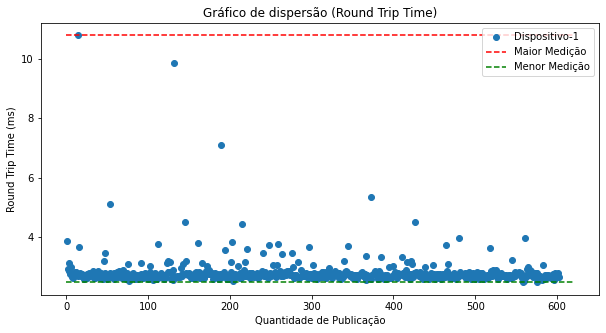

In [8]:
import matplotlib 
i=1
fig, ax = plt.subplots(figsize=(10,5),dpi=72)
for port in ports:
  ax.scatter(data[port]["RTT"].index,data[port]["RTT"], label='Dispositivo-{}'.format(i))
  ax.set_ylabel('Round Trip Time (ms)')
  ax.set_xlabel('Quantidade de Publicação')
  ax.set_title('Gráfico de dispersão (Round Trip Time)')
  ax.hlines(data[port]["RTT"].max(),  xmin=0, xmax=620, colors="red", linestyles="dashed", label="Maior Medição")
  ax.hlines(data[port]["RTT"].min(),  xmin=0, xmax=620, colors="green", linestyles="dashed", label="Menor Medição")
  ax.legend()
  i+=1


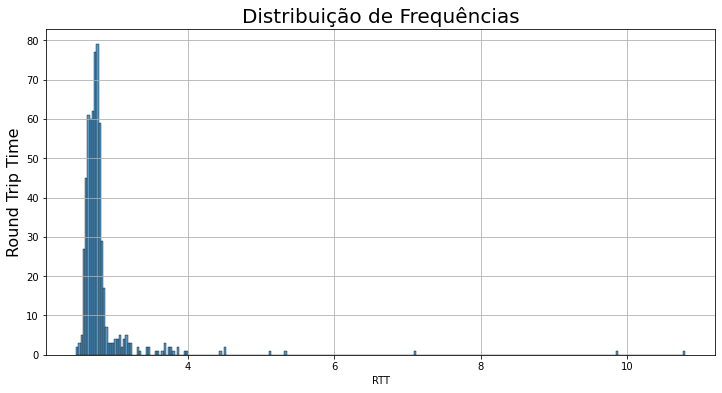

In [9]:
i=1
fig, ax = plt.subplots(figsize=(20,5),dpi=72)
for port in ports:
  ax = sns.histplot(data[port]["RTT"])
  ax.figure.set_size_inches(12, 6)
  ax.set_title('Distribuição de Frequências', fontsize=20)
  ax.set_ylabel('Round Trip Time', fontsize=16)
  ax.grid()
  i+=1

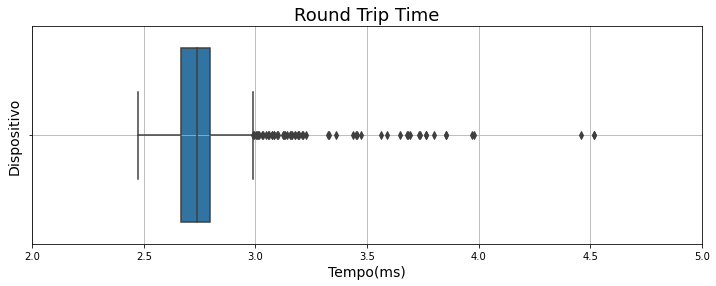

In [10]:
fig, ax = plt.subplots(figsize=(20,5),dpi=72)
for port in ports:
  ax = sns.boxplot(x = 'RTT', data = data[port], orient = 'h')
  ax.figure.set_size_inches(12, 4)
  ax.set_title('Round Trip Time', fontsize=18)
  ax.set_xlabel('Tempo(ms)', fontsize=14)
  ax.set_ylabel('Dispositivo', fontsize=14)
  ax.grid()

  ax.set_xlim(2, 5)

In [11]:
## Analisando outliers
df_novo = {}
for port in ports:
  data[port]
  q3, q1 = np.percentile(data[port]["RTT"], [75, 25])
  interquartil = q3 - q1
  limite_superior =q3 + 1.5 * interquartil
  limite_inferior = q1 - 1.5 * interquartil 
  df_novo[port] = data[port].loc[((data[port]["RTT"]>limite_inferior) & (data[port]["RTT"]<limite_superior))]
  dados_excluidos = data[port]["RTT"].shape[0] - len(df_novo[port])

  print("Q3", q3)
  print("Q1", q1)
  print("FIQ", interquartil)
  print("limite_superior", limite_superior)
  print("limite_inferior", limite_inferior)
  print("média nova", df_novo[port]["RTT"].mean())
  print("Média antiga", data[port]["RTT"].mean())
  print("Median", data[port]["RTT"].median())
  print("Median", df_novo[port]["RTT"].median())


Q3 2.7943842500235405
Q1 2.665170250054416
FIQ 0.12921399996912442
limite_superior 2.988205249977227
limite_inferior 2.4713492501007295
média nova 2.718049135185336
Média antiga 2.822141294021009
Median 2.736133500093274
Median 2.721745500025463


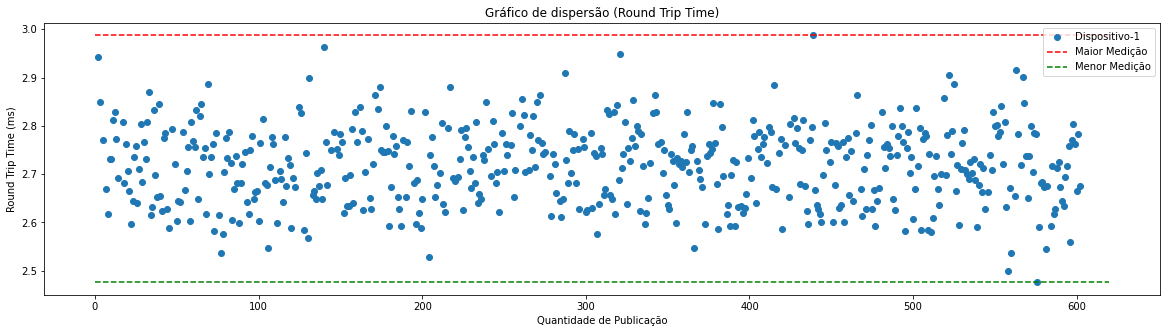

In [12]:
import matplotlib 

i=1
fig, ax = plt.subplots(figsize=(20,5),dpi=72)
for port in ports:
  ax.scatter(df_novo[port]["RTT"].index,df_novo[port]["RTT"], label='Dispositivo-{}'.format(i))
  ax.set_ylabel('Round Trip Time (ms)')
  ax.set_xlabel('Quantidade de Publicação')
  ax.set_title('Gráfico de dispersão (Round Trip Time)')
  ax.hlines(df_novo[port]["RTT"].max(),  xmin=0, xmax=620, colors="red", linestyles="dashed", label="Maior Medição")
  ax.hlines(df_novo[port]["RTT"].min(),  xmin=0, xmax=620, colors="green", linestyles="dashed", label="Menor Medição")
  ax.legend()
  i+=1


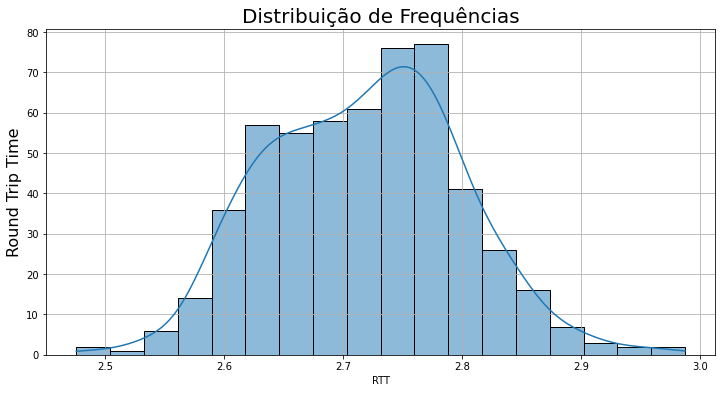

In [13]:
i=1
fig, ax = plt.subplots(figsize=(20,5),dpi=72)
for port in ports:
  ax = sns.histplot(df_novo[port]["RTT"], kde=True)
  ax.figure.set_size_inches(12, 6)
  ax.set_title('Distribuição de Frequências', fontsize=20)
  ax.set_ylabel('Round Trip Time', fontsize=16)
  ax.grid()
  i+=1

# CÁLCULO DO TAMANHO DA AMOSTRA

In [14]:
nivel_de_significancia = 0.05

In [15]:
nivel_de_confiança = 1 - nivel_de_significancia
nivel_de_confiança

0.95

In [16]:
#Calculando o z com scipy
z = scipy.stats.norm.ppf(0.975)
z

1.959963984540054

Com nosso z calculado podemos seguir adiante

### $$z = 1.959963984540054 $$

Abaixo segue algumas formulas que iremos utilizar para calcular o numero de amostra



## $$n = \left(z\frac{s}{e}\right)^2$$


$$e = \left(e *  \right)^2$$



Onde:

$z$ = variável normal padronizada

$s$ = desvio padrão amostral

$e$ = erro inferencial


### Calculando a desvio padrão $s$

In [17]:
desvio_padrao_amostral = RTT["RTT"].std()
desvio_padrao_amostral

0.5457039128427974

### Calculando o Erro

In [18]:
media = RTT["RTT"].mean()
e = 0.05 * media
e

0.14110706470105047

### Calculando o tamanho da nossa amostra

In [19]:
n = (z * (desvio_padrao_amostral/e))**2
n

57.45301204665968

In [20]:
n = (z * (desvio_padrao_amostral/e))**2

In [21]:
n

57.45301204665968